# Simulate current injections into one or more neurons in a network

First we define the network. Generating the network is relatively fast, so you can generate a larger network. Simulating the full network is slower, so by default only the neurons receiving a current injection, and their post synaptic targets are simulated.

In the cell below we define the number of neurons we want, and the volume we place them inside.

In [1]:
import os

n_dSPN = 4
n_iSPN = 4
n_FS = 4
n_LTS = 1
n_ChIN = 0


network_path = os.path.join("networks","pair_recording_simulation")
volume_type="cube"
side_len = 100e-6

Snudda init writes the ```network-config.json``` file.

In [2]:
from snudda.init.init import SnuddaInit
cnc = SnuddaInit(struct_def={}, network_path=network_path, random_seed=13371)
cnc.define_striatum(num_dSPN=n_dSPN, num_iSPN=n_iSPN, num_FS=n_FS, num_LTS=n_LTS, num_ChIN=n_ChIN,
                    volume_type="cube", side_len=side_len)
cnc.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/fs
Adding neurons: dSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/ispn
Adding neurons: LTS from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/lts
No directory $SNUDDA_DATA/neurons/striatum/ngf, skipping NGF cells.
Writing networks/pair_recording_simulation/network-config.json


In [3]:
from snudda import Snudda
snd = Snudda(network_path=network_path)
snd.create_network()

Placing neurons
Network path: networks/pair_recording_simulation
Reading SNUDDA_DATA=None from networks/pair_recording_simulation/network-config.json
Reading SNUDDA_DATA=/home/hjorth/HBP/Snudda/snudda/utils/../data from networks/pair_recording_simulation/network-synapses.hdf5
Generating 146 points for networks/pair_recording_simulation/mesh/Striatum-cube-mesh-5.4456428798476186e-05.obj
n_points = 139, previous close_pairs = 200
n_points = 132, previous close_pairs = 161
n_points = 125, previous close_pairs = 131
n_points = 119, previous close_pairs = 106
n_points = 113, previous close_pairs = 88
n_points = 108, previous close_pairs = 71
n_points = 103, previous close_pairs = 59
n_points = 99, previous close_pairs = 50
n_points = 95, previous close_pairs = 42
n_points = 92, previous close_pairs = 34
n_points = 89, previous close_pairs = 28
n_points = 87, previous close_pairs = 23
n_points = 68, previous close_pairs = 19
Filtering 68 points..
Filtering, keeping inside points: 14 / 68
sto

Snudda Place, Detect and Prune. Here the neurons are placed in the network, synapse touch detection is done, and finally pruning of the putative synapses.

In [4]:
!snudda_load networks/pair_recording_simulation/network-synapses.hdf5 --listN

Loading networks/pair_recording_simulation/network-synapses.hdf5
Loading config data from HDF5
Loading 13 neurons with 235 synapses and 13 gap junctions
Load done. 0.0
Neurons in network: 
0 : FS_3 [0] (x: 0.004735, y: 0.004002, z: 0.007724)
1 : FS_1 [0] (x: 0.004741, y: 0.003997, z: 0.007742)
2 : FS_2 [0] (x: 0.004758, y: 0.004015, z: 0.007737)
3 : dSPN_1 [0] (x: 0.004727, y: 0.004012, z: 0.007757)
4 : FS_0 [0] (x: 0.004767, y: 0.003987, z: 0.007729)
5 : LTS_0 [0] (x: 0.004764, y: 0.003992, z: 0.007747)
6 : iSPN_0 [0] (x: 0.004750, y: 0.003986, z: 0.007757)
7 : dSPN_3 [0] (x: 0.004743, y: 0.004014, z: 0.007764)
8 : iSPN_3 [0] (x: 0.004769, y: 0.003976, z: 0.007742)
9 : iSPN_2 [0] (x: 0.004724, y: 0.004026, z: 0.007764)
10 : dSPN_2 [0] (x: 0.004757, y: 0.003998, z: 0.007772)
11 : iSPN_1 [0] (x: 0.004750, y: 0.003984, z: 0.007773)
12 : dSPN_0 [0] (x: 0.004766, y: 0.003979, z: 0.007775)


In [5]:
!snudda_load networks/pair_recording_simulation/network-synapses.hdf5 --listPost 4

Loading networks/pair_recording_simulation/network-synapses.hdf5
Loading config data from HDF5
Loading 13 neurons with 235 synapses and 13 gap junctions
Load done. 0.0
List neurons post-synaptic to neuron_id = 4 (FS_0):
Finding synapses originating from 4, this is slow
The neuron makes 34 synapses on other neurons
2 : FS_2 (2 synapses)
3 : dSPN_1 (6 synapses)
7 : dSPN_3 (7 synapses)
8 : iSPN_3 (5 synapses)
9 : iSPN_2 (4 synapses)
10 : dSPN_2 (7 synapses)
12 : dSPN_0 (3 synapses)


We compile the neuron mechanisms for the simulation. Here we just use the default mechanisms provided.

In [6]:
!nrnivmodl ../../snudda/data/neurons/mechanisms

/home/hjorth/HBP/Snudda/examples/notebooks
Mod files: "../../snudda/data/neurons/mechanisms/../../snudda/data/neurons/mechanisms/bk_ch.mod" "../../snudda/data/neurons/mechanisms/../../snudda/data/neurons/mechanisms/bk_fs.mod" "../../snudda/data/neurons/mechanisms/../../snudda/data/neurons/mechanisms/bk_ms.mod" "../../snudda/data/neurons/mechanisms/../../snudda/data/neurons/mechanisms/ca_ch.mod" "../../snudda/data/neurons/mechanisms/../../snudda/data/neurons/mechanisms/cadyn_fs.mod" "../../snudda/data/neurons/mechanisms/../../snudda/data/neurons/mechanisms/cadyn_ms.mod" "../../snudda/data/neurons/mechanisms/../../snudda/data/neurons/mechanisms/cal12_ms.mod" "../../snudda/data/neurons/mechanisms/../../snudda/data/neurons/mechanisms/cal13_ms.mod" "../../snudda/data/neurons/mechanisms/../../snudda/data/neurons/mechanisms/cal_ch.mod" "../../snudda/data/neurons/mechanisms/../../snudda/data/neurons/mechanisms/caldyn_ms.mod" "../../snudda/data/neurons/mechanisms/../../snudda/data/neurons/mecha

Run the NEURON simulation of the network. The setup is defined in the [experiment-config-7.json](../../snudda/data/experiment_config/pair_recording/experiment-config-7.json) file.

In [7]:
from snudda.simulate.pair_recording import PairRecording 
experiment_config_file = os.path.join("..","..", "snudda", "data", "experiment_config", "pair_recording", "experiment-config-7.json")
pr = PairRecording(network_path=network_path, experiment_config_file=experiment_config_file)

Pair recording output file: networks/pair_recording_simulation/simulation/network-output-7.hdf5
Reading SNUDDA_DATA=None from networks/pair_recording_simulation/network-config.json
Reading SNUDDA_DATA=/home/hjorth/HBP/Snudda/snudda/utils/../data from networks/pair_recording_simulation/network-synapses.hdf5
0 : Memory status: 64% free
Empty mod_file field for ChIN -> dSPN synapses. This channel is IGNORED.
Empty mod_file field for ChIN -> iSPN synapses. This channel is IGNORED.
Warning! No modulation key specified, ignoring /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/fs/str-fs-e161205_FS1-mMTC180800A-IDB-v20190312/modulation.json
Warning! No modulation key specified, ignoring /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20190521/modulation.json
Warning! No modulation key specified, ignoring /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/fs/str-fs-e160628_FS2-mMTC180800A-IDB-v20190226/modulation.json
Warning! No modulation 

In [8]:
pr.run()

Running simulation for 4.0 s
Running Neuron simulator 4000 ms, with dt=0.025
1% done. Elapsed: 1.3 s, estimated time left: 125.1 s
79% done. Elapsed: 102.2 s, estimated time left: 27.2 s
Neuron simulation finished
Simulation run time: 127.8 s
Writing network output to networks/pair_recording_simulation/simulation/network-output-7.hdf5
Using sample dt = None (sample step size None)
Worker 1/1 writing data to networks/pair_recording_simulation/simulation/network-output-7.hdf5


## Plot the results

First we start with an overview trace of all the neurons that receive a current injection, and their post synaptic targets.

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 2  3  4  7  8  9 10 12]
Plotting traces: [10, 12, 2, 3, 4, 7, 8, 9]
Plotted 8 traces (total 8)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Network-voltage-trace-Example7-FS-dSPN-iSPN.pdf


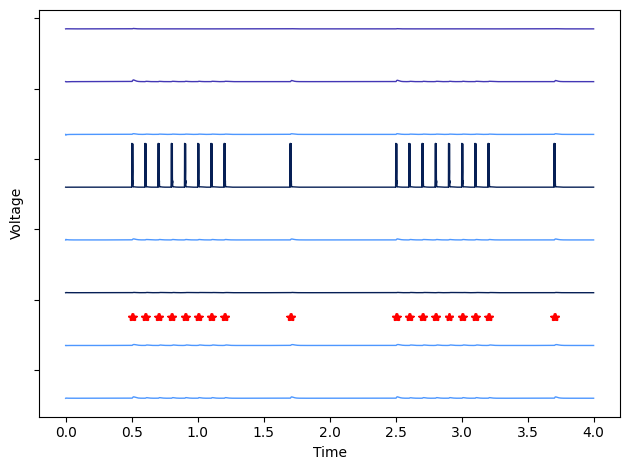

In [9]:
%matplotlib inline
pr.plot_trace_overview()

We can also plot the individual post synaptic traces, with the current pulses marked.

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 2  3  4  7  8  9 10 12]
!!! Excluding first 0.25 s from the plot
Plotting traces: [2]
Plotted 1 traces (total 8)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-2.pdf


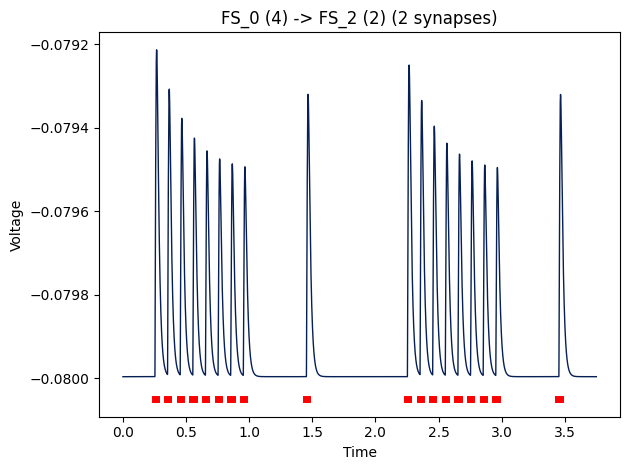

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 2  3  4  7  8  9 10 12]
!!! Excluding first 0.25 s from the plot
Plotting traces: [3]
Plotted 1 traces (total 8)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-3.pdf


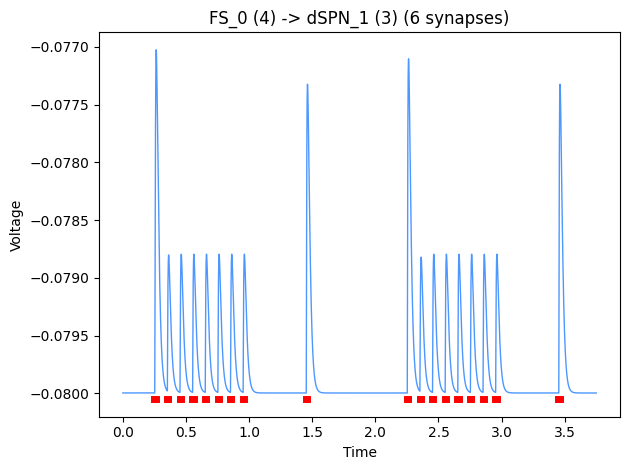

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 2  3  4  7  8  9 10 12]
!!! Excluding first 0.25 s from the plot
Plotting traces: [7]
Plotted 1 traces (total 8)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-7.pdf


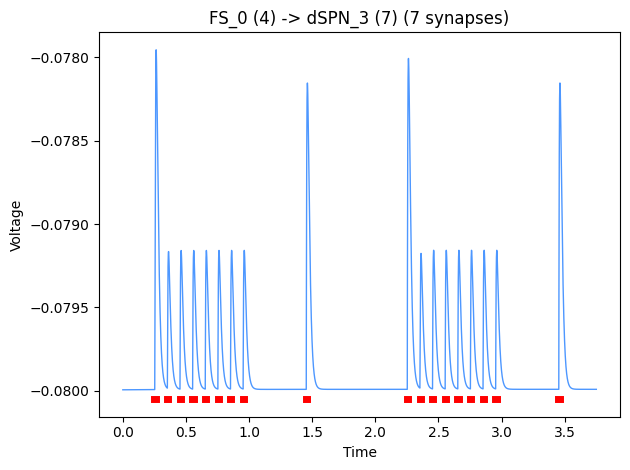

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 2  3  4  7  8  9 10 12]
!!! Excluding first 0.25 s from the plot
Plotting traces: [8]
Plotted 1 traces (total 8)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-8.pdf


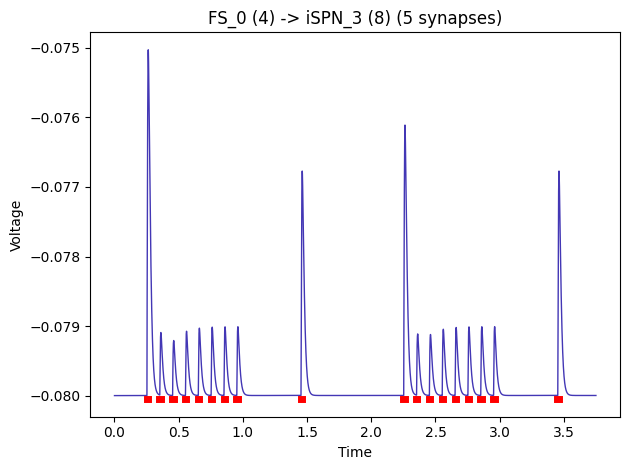

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 2  3  4  7  8  9 10 12]
!!! Excluding first 0.25 s from the plot
Plotting traces: [9]
Plotted 1 traces (total 8)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-9.pdf


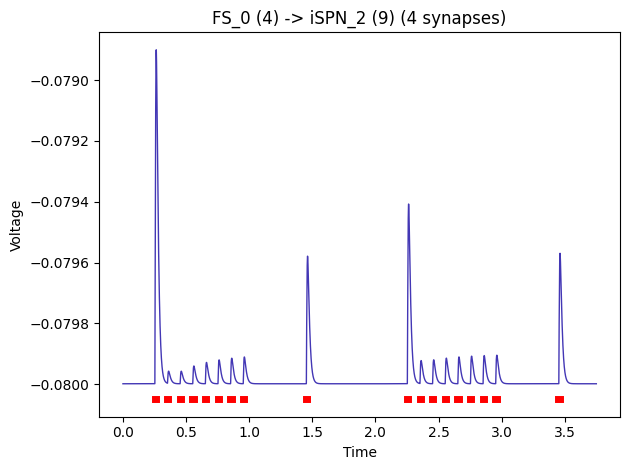

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 2  3  4  7  8  9 10 12]
!!! Excluding first 0.25 s from the plot
Plotting traces: [10]
Plotted 1 traces (total 8)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-10.pdf


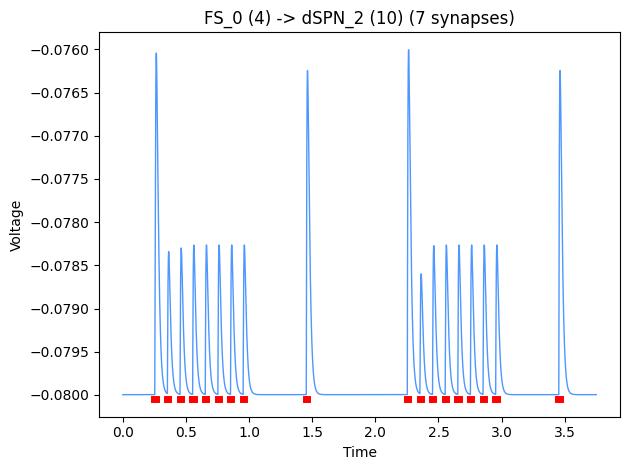

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 2  3  4  7  8  9 10 12]
!!! Excluding first 0.25 s from the plot
Plotting traces: [12]
Plotted 1 traces (total 8)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-12.pdf


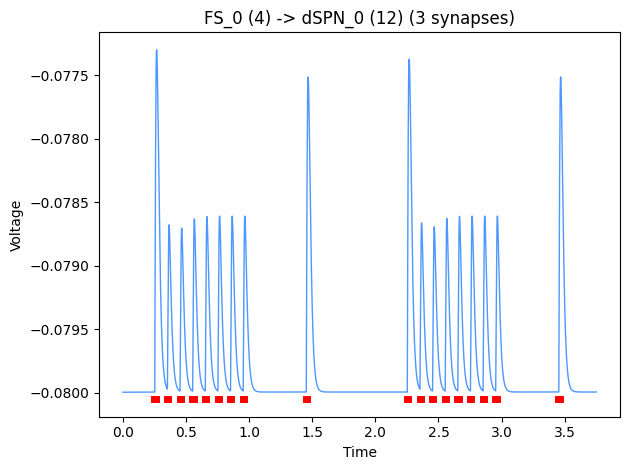

In [10]:
%matplotlib inline
pr.plot_traces()

Skipping trace 2, not in trace_id=[12]
Skipping trace 3, not in trace_id=[12]
Skipping trace 7, not in trace_id=[12]
Skipping trace 8, not in trace_id=[12]
Skipping trace 9, not in trace_id=[12]
Skipping trace 10, not in trace_id=[12]
Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 2  3  4  7  8  9 10 12]
!!! Excluding first 0.25 s from the plot
Plotting traces: [12]
Plotted 1 traces (total 8)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-12.pdf


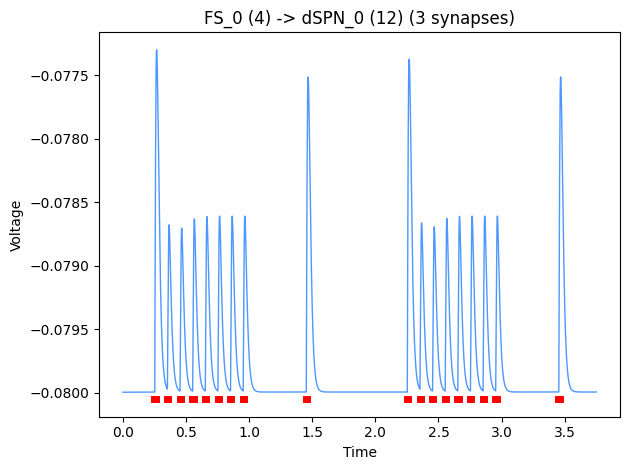

In [11]:
pr.plot_traces(trace_id=[12])

In [12]:
!snudda_load networks/pair_recording_simulation/network-synapses.hdf5 --listPre 12

Loading networks/pair_recording_simulation/network-synapses.hdf5
Loading config data from HDF5
Loading 13 neurons with 235 synapses and 13 gap junctions
Load done. 0.0
List neurons pre-synaptic to neuron_id = 12 (dSPN_0)
The neuron receives 23 synapses
0 : FS_3 (7 synapses)
2 : FS_2 (7 synapses)
4 : FS_0 (3 synapses)
7 : dSPN_3 (3 synapses)
10 : dSPN_2 (3 synapses)


### Plotting synaptic currents

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 2  3  4  7  8  9 10 12]


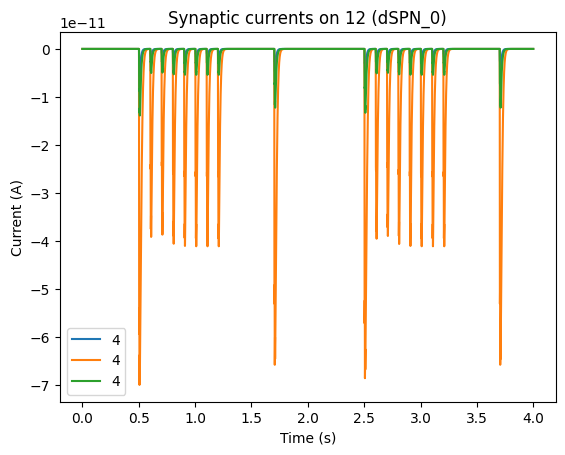

<Figure size 640x480 with 0 Axes>

In [13]:
pr.plot_synaptic_currents(post_id=12)

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 2  3  4  7  8  9 10 12]


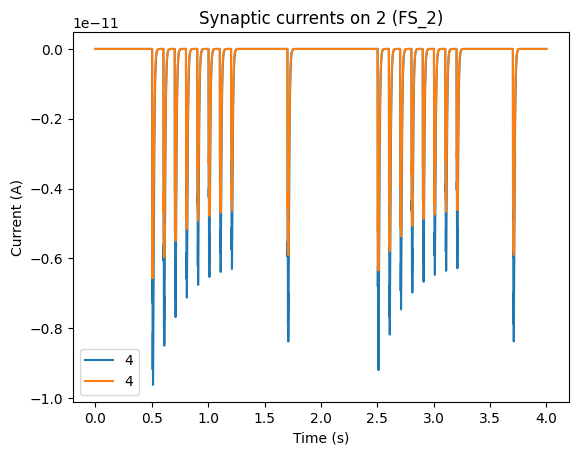

<Figure size 640x480 with 0 Axes>

In [14]:
pr.plot_synaptic_currents(post_id=2)

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 2  3  4  7  8  9 10 12]


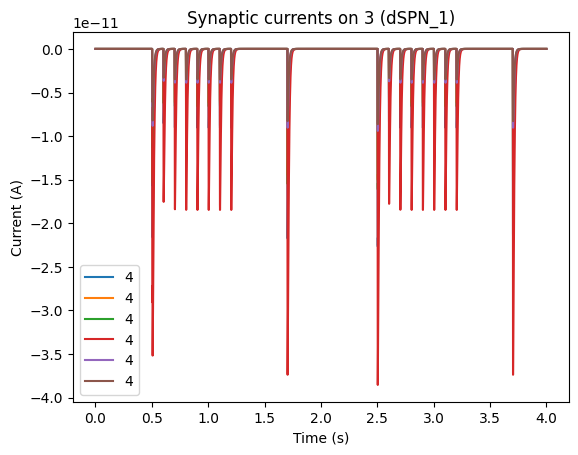

<Figure size 640x480 with 0 Axes>

In [15]:
pr.plot_synaptic_currents(post_id=3)